In [18]:
import itertools

def kbits(n, k):
    # Generate all binary sequence of length n with k '1's
    result = []
    for bits in itertools.combinations(range(n), k):
        s = ['0'] * n
        for bit in bits:
            s[bit] = '1'
        result.append(''.join(s))
    return result

def checkDyckPath(path,n,m):
    # Check whether a given path is a Dyck Path in an n x m grid
    count0 = 0;
    count1 = 0;
    if len(path) < n+m:
        return "Error: Invalid path for given grid (path length too short)"
    for i in range(0,n+m-1,1):
        if int(path[i]) == 0:
            count0 +=1;
        if int(path[i]) ==1:
            count1 +=1;
        if count0 == 0:
            return False;
        if (count1/count0) > m/n:
            return False;
    return True;

def genDyckPaths(n,m):
    # Generate all Dyck Paths in an n x m grid
    # Paths represented as binary sequences where 0 is 'up' and 1 is 'right'
    DyckPaths = [];
    seq = kbits(n+m,m);
    for x in seq:
        if checkDyckPath(x,n,m):
            DyckPaths.append(x);
    print("Number of DyckPaths is {}".format(str(len(DyckPaths))))
    return DyckPaths;

import matplotlib.pyplot as plt
import math

# Dimensions of Arrow
length = 0.9
width= 0.01
head_width = 0.1

def drawPath( ax, path ):
    # Draw out the Dyck path
    x = 0.0 + head_width
    y = 0.0 + head_width
    color = "blue"
    
   # ax.set_aspect('equal','box')
    for d in path:
        if d == '0':
            dx = 0.0
            dy = length + head_width - width
        else:
            dx = length + head_width - width
            dy = 0.0
        ax.arrow( x, y, dx, dy,
                  width = width,
                  head_width = head_width,
                  color = color,
                 length_includes_head = True)
        x += dx
        y += dy
        if color == "blue":
            color = "red"
        else:
            color = "blue"
            
def graphDyckPaths(n,m):
    DyckPaths = genDyckPaths(n,m);
    N = int(math.sqrt(len(DyckPaths)))
    for i, p in enumerate(DyckPaths):
        ax = plt.subplot(N+1,N+1,i+1)
        # Change range of axes 
        ax.axis([0,max(n,m)+1,0,max(n,m)+1])
        ax.grid(True)
        drawPath( ax, p )
    # Scale up figure by N
    params = plt.gcf()
    pltSize = params.get_size_inches()
    params.set_size_inches( (pltSize[0]*N, pltSize[1]*N))
    plt.show()

Number of DyckPaths is 30


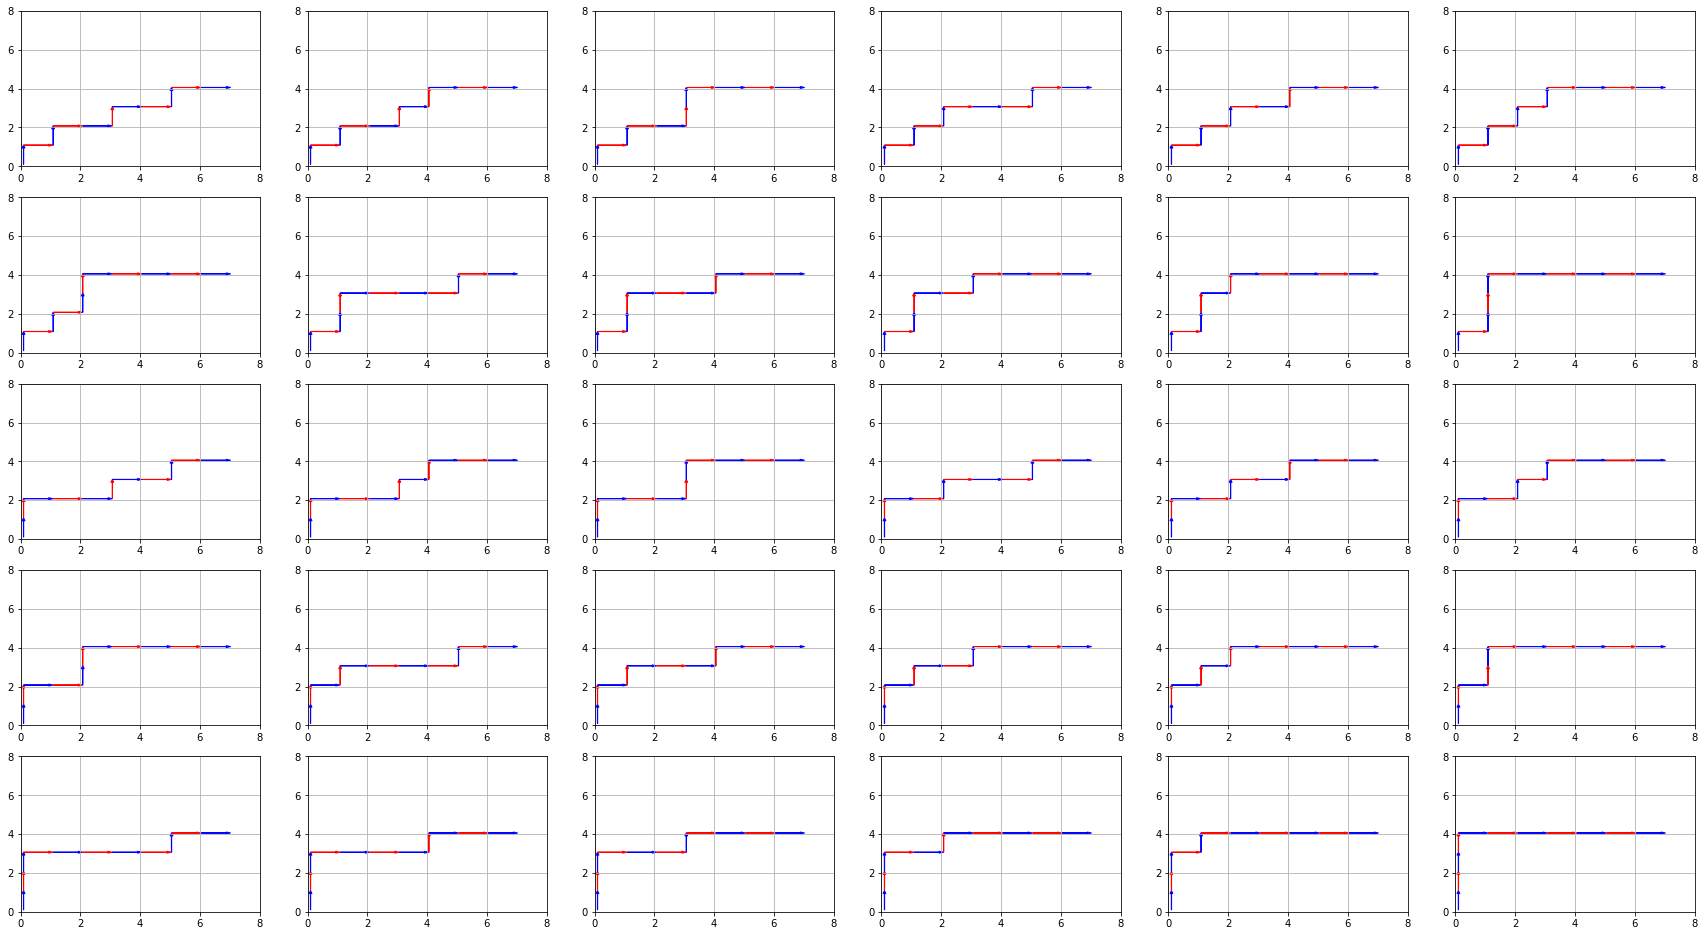

In [21]:
graphDyckPaths(4,7)